# new execution

In [ ]:
# import libraries
from scipy.constants import femto, pico, nano, micro, milli, kilo, liter, N_A, h, c, minute
from math import pow, pi, cos, radians
from chemicals.elements import periodic_table
import json
import sys
import re

# libraries for ui
from tkinter import *
from tkinter import ttk
import os
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from tkinter.filedialog import asksaveasfile
from tkinter.filedialog import askopenfile
import threading
import pdipy
            
### =====================================================
### UI CODE BELOW HERE         
### =====================================================
            
#ui -> logic functions
def start_simulation(data_elements):
    clear_console()
    
    get_list = []
    get_executed_list = []
    data_type_list = []
    variable_name_list = []
    
    for element in data_elements:
        get_list.append(element["get_element"])
        get_executed_list.append(element["get_element"].get())
        data_type_list.append(element["data_type"])
        variable_name_list.append(element["variable_name"])
    
    print(data_elements)
    
    inputs_good = verify_ui_inputs(get_executed_list, data_type_list, variable_name_list)
    
    if inputs_good:
        print("inputs were good")
        proccessed_data_list = {}
        for i in range(len(get_list)):
            if data_type_list[i] == "num":
                proccessed_data_list[variable_name_list[i]] = float(get_list[i].get())
                
            elif data_type_list[i] == "string":
                proccessed_data_list[variable_name_list[i]] = get_list[i].get()
            if proccessed_data_list[variable_name_list[i]] == "":
                proccessed_data_list[variable_name_list[i]] = None
        print(proccessed_data_list)
        t = threading.Thread(target=run_simulation, args=(proccessed_data_list["Simulation time"], proccessed_data_list["Bacterial species"], proccessed_data_list["Photosensitizer"], proccessed_data_list["Photosensitizer molarity"], proccessed_data_list["Light source"], proccessed_data_list["Surface area"], proccessed_data_list["Solution volume"], proccessed_data_list["Solution depth"], proccessed_data_list["Photosensitizer surface area"], proccessed_data_list["Molecular proportion"], proccessed_data_list["Photosensitizer moles per square cm"]))
        t.start()
            
def run_simulation(simulation_time, bacterial_species, photosensitizer, photosensitizer_molarity, light_source, surface_area, surface_volume, solution_depth, photosensitizer_surface_area, molecular_proportion, photosensitizer_moles_per_square_cm):
    pdi = pdipy.PDIBacterialPkg()
    pdi.define_system(surface_area=surface_area, solution_volume=solution_volume, solution_depth=solution_depth, photosensitizer_surface_area=photosensitizer_surface_area)
    pdi.define_bacterium(bacterial_specie=bacterial_species)
    pdi.define_photosensitizer(photosensitizer_molar=photosensitizer_molarity, photosensitizer=photosensitizer)
    pdi.define_light(light_source=light_source, simulation_time=simulation_time)
    pdi.define_photosensitizer_volume(molecular_proportion = molecular_proportion, photosensitizer_moles_per_square_cm=photosensitizer_moles_per_square_cm)
    
    #pdi.simulate(light, end_time = end_time, timestep = timestep, kinetc_constant = kinetic_constant, photon_collision_proportion = photon_collision_proportion)
    #NEW PDI PY simulate command here

def clear_console():
    console_box.configure(state='normal')
    console_box.delete(1.0, "end")
    console_box.configure(state='disabled')
    

#verify the ui inputs
def verify_ui_inputs(values, expected_types, input_names):
    inputs_good = True
    
    for i in range(len(values)):
        input_is_good = verify_ui_input(values[i], expected_types[i], input_names[i])
        
        if not input_is_good:
            inputs_good = False
            
    return inputs_good

def verify_ui_input(value, expected_type, input_name):
    if expected_type == "string":
        try:
            temp = str(value)
            return True
        except:
            console_message("INPUT ERROR: " + input_name + " should be a number.")
            return False
    elif expected_type == "num":
        try:
            temp = float(value)
            return True
        except:
            console_message("INPUT ERROR: " + input_name + " should be a number.")
            return False
        

#UI functions
def ui_choice(frame, choices, default, x, y):
    choice_variable = StringVar(frame)
    choice_variable.set(default)
    OptionMenu(frame, choice_variable, *choices).place(x=x, y=y)
    return choice_variable

def console_message(message):
    console_box.configure(state='normal')
    console_box.insert("end", message + "\n")
    console_box.configure(state='disabled')
    

#UI
window_title = "Membrane Model"
background = "#FFFFFF"
primary = "#1c1c1c"
primary_variant = "#3700B3"
secondary = "#8a8a8a"
secondary_variant = "#1c1c1c"
header_frame_height = 50

root = Tk()
root.title(window_title)
    

#Setup resolution
window_width = root.winfo_screenwidth()
window_height = root.winfo_screenheight()
    
body_frame_height = window_height - header_frame_height
    
root.geometry(str(window_width) + "x" + str(window_height))
root.configure(background=background)

root.resizable(True, True)
    
root_frame = Frame(root, bg=background)
root_frame.pack()


#LEFT FRAME START -------------------------
left_frame = Frame(root_frame, width = window_width/5, height = window_height, bg=secondary)
left_frame.pack_propagate(0)
left_frame.grid(row = 0, column = 0)

left_frame_header = Label(left_frame, text="Control Panel", font="fixedsys 22", fg=primary, bg=secondary)
left_frame_header.pack(pady=8)
#LEFT FRAME END -------------------------


#RIGHT FRAME START ------------------------
right_frame = Frame(root_frame, width = window_width/5, height = window_height, bg=secondary)
right_frame.pack_propagate(0)
right_frame.grid(row = 0, column = 2)

right_frame_header_label = Label(right_frame, text="Environment", font="fixedsys 22", fg=primary, bg=secondary)
right_frame_header_label.pack(pady=8)

def pack_inputs():
    # parameters and acceptable answers
    label_text = ["Simulation time:", "Bacterial species:", "Photosensitizer:", "Photosensitizer molarity:", "Light source:", "Surface area:", "Solution volume:", "Solution depth:", "Photosensitizer surface area:", "Molecular proportion:", "Photosensitizer moles per square cm:"]
    data_type = ["num", "string", "string", "num", "string", "num", "num", "num", "num", "num", "num"]
    variable_name = ["Simulation time", "Bacterial species", "Photosensitizer", "Photosensitizer molarity", "Light source", "Surface area", "Solution volume", "Solution depth", "Photosensitizer surface area", "Molecular proportion", "Photosensitizer moles per square cm"]
    input_type = ["entry", "choice", "choice", "entry", "choice", "entry", "entry", "entry", "entry", "entry", "entry"]
    choice_increment = 0
    choices = [['Saureus'],
               ['A3B_4Zn', 'A3B-tetracationic zinc porphyrin', 'A3B-tetracationic copper porphyrin', 'A3B-dicationic zinc porphyrin', 'A3-monocationic gallium corrole'],
               ['LED', 'Incandescent']]
    unit_label = ["minutes", "n/a", "n/a", "molar", "n/a", "n/a", "n/a", "n/a", "n/a", "n/a", "n/a"]
    choice_default = ['Saureus', 'A3B_4Zn', 'LED']
    
    # coordinate values
    x = 10
    y = 50
    y_increment_choice = 60
    y_increment_entry = 45
    
    data_elements = []
    for i in range(len(label_text)):
        data_element = {"input_type":input_type[i], "variable_name":variable_name[i], "data_type":data_type[i], "get_element":""}
        temp_label = Label(right_frame, text=label_text[i], font="fixedsys 16", fg=primary, bg=secondary)
        temp_label.place(x=x, y=y)
        if input_type[i] == "entry":
            temp_entry = Entry(right_frame)
            temp_entry.place(x=x, y=y+22)
            if unit_label[i] != "n/a":
                temp_unit_label = Label(right_frame, text=unit_label[i], font="fixedsys 16", fg=primary, bg=secondary)
                temp_unit_label.place(x=x+110, y=y+22)
            y += y_increment_entry
            data_element["get_element"] = temp_entry
            
        elif input_type[i] == "choice":
            temp_variable = ui_choice(right_frame, choices[choice_increment], choice_default[choice_increment], x, y+25)
            data_element["get_element"] = temp_variable
            y += y_increment_choice
            choice_increment += 1
        data_elements.append(data_element)
    
    light_input_label = Label(right_frame, text="Light input:", font="fixedsys 16", fg=primary, bg=secondary)
    light_input_label.place(x=x, y=y)
    light_input_entry = Entry(right_frame)
    light_input_entry.place(x=x, y=y+22)
    temp_variable = ui_choice(right_frame, ["irradiance", "exposure", "lux", "lumen"], "irradiance", x+130, y+17)
    
    y += y_increment_choice
    return data_elements
     
data_elements = pack_inputs()
print(data_elements)

"""
#IMPORT BUTTON
import_button = Button(right_frame, text="Import Setup", command = lambda: import_environment (time_step_entry, species_variable, photosensitizer_variable, porphyrin_concentration_entry, light_excite_variable, luminous_intensity_entry, source_variable, source_wattage_entry))
import_button.place(x = 30, y = 670)

#EXPORT BUTTON
export_button = Button(right_frame, text="Export Setup", command = lambda: export_environment (time_step_entry, species_variable, photosensitizer_variable, porphyrin_concentration_entry, light_excite_variable, luminous_intensity_entry, source_variable, source_wattage_entry))
export_button.place(x = 140, y = 670)
"""
#RIGHT FRAME END ------------------------


#START BUTTON
start_button = Button(left_frame, text="Start Simulation", command = lambda: start_simulation (data_elements))
start_button.place(x = int((window_width/5)*0.27), y = 50)


#MIDDLE FRAME START --------
middle_frame = Frame(root_frame, width = window_width*3/5, height = window_height, bg = primary_variant)
middle_frame.grid(row = 0, column = 1)
#MIDDLE FRAME END ---------

header_frame = Frame(middle_frame, bg = background, width = window_width*3/5, height = 50, highlightthickness=3, highlightbackground=secondary_variant)
header_frame.pack_propagate(0)
header_frame.pack(side = TOP)


header = Label(header_frame, text="Membrane Model", font="fixedsys 33", fg=primary, bg=background)
header.pack()


body_frame = Frame(middle_frame, width = window_width*3/5, bg=background, height = body_frame_height, highlightthickness=3, highlightbackground=secondary_variant)
body_frame.pack_propagate(0)
body_frame.pack(side = BOTTOM)

#middle top frame for console outputs
middle_top_frame = Frame(body_frame, width = window_width*3/5, height = body_frame_height/2, bg = primary_variant)
middle_top_frame.pack_propagate(0)
middle_top_frame.pack()


scrollbar = Scrollbar(middle_top_frame)
console_box = Text(middle_top_frame, height=100, width= int(window_width*3/5), yscrollcommand=scrollbar.set, font=("Helvetica", 10), borderwidth=1, relief="solid")
scrollbar.config(command=console_box.yview)
scrollbar.pack(side=RIGHT, fill=Y)
console_box.pack(side="left")
console_box.configure(state='disabled')


#middle bottom frame for matplot lib graphs
middle_bottom_frame = Frame(body_frame, width = window_width*3/5, height = body_frame_height/3, bg = background)
middle_top_frame.pack_propagate(0)
middle_bottom_frame.pack()


fig, ax = plt.subplots()
ax.set_title('Fatty acid oxidation porportion')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("% Oxidiation (oxidized / total)")

# creating the Tkinter canvas
# containing the Matplotlib figure
canvas = FigureCanvasTkAgg(fig, master = middle_bottom_frame)  
canvas.draw()
 
# placing the canvas on the Tkinter window
canvas.get_tk_widget().pack()
 
# creating the Matplotlib toolbar
toolbar = NavigationToolbar2Tk(canvas, middle_bottom_frame)
toolbar.update()
 
# placing the toolbar on the Tkinter window
canvas.get_tk_widget().pack()

def plot_oxidation(oxidation_graph_timesteps_in, oxidation_graph_data_in):

    oxidized_death_threshold = 10
    ax.clear()
  
    for entry in oxidation_graph_data_in:
        ax.plot(oxidation_graph_timesteps_in, entry[1], label = entry[0])
        
    ax.plot(oxidation_graph_timesteps_in, [oxidized_death_threshold for i in range(len(oxidation_graph_timesteps_in))], label = "Oxidized death threshold")
    ax.set_title('Fatty acid oxidation porportion')
    ax.set_xlabel("Time (minutes)")
    ax.set_ylabel("% Oxidiation (oxidized / total)")
    ax.legend(loc='best', fontsize = 'small')

    canvas.draw()
    

#MIDDLE FRAME END ---------
root.mainloop()

'''
pdi = PDIBacterialPkg()
light = pdi.define(bacterial_species = 'Saureus', porphyrin_selection = 'A3B_4Zn', porphyrin_conc = 1, light_source = 'LED', wattage = 40)
pdi.simulate(light, end_time = 600, timestep = 10, kinetc_constant = 1, photon_collision_proportion = 1E-9, )
'''

[{'input_type': 'entry', 'variable_name': 'Simulation time', 'data_type': 'num', 'get_element': <tkinter.Entry object .!frame.!frame2.!entry>}, {'input_type': 'choice', 'variable_name': 'Bacterial species', 'data_type': 'string', 'get_element': <tkinter.StringVar object at 0x00000214F26D4F88>}, {'input_type': 'choice', 'variable_name': 'Photosensitizer', 'data_type': 'string', 'get_element': <tkinter.StringVar object at 0x00000214F26D6348>}, {'input_type': 'entry', 'variable_name': 'Photosensitizer molarity', 'data_type': 'num', 'get_element': <tkinter.Entry object .!frame.!frame2.!entry2>}, {'input_type': 'choice', 'variable_name': 'Light source', 'data_type': 'string', 'get_element': <tkinter.StringVar object at 0x00000214F26D6C08>}, {'input_type': 'entry', 'variable_name': 'Surface area', 'data_type': 'num', 'get_element': <tkinter.Entry object .!frame.!frame2.!entry3>}, {'input_type': 'entry', 'variable_name': 'Solution volume', 'data_type': 'num', 'get_element': <tkinter.Entry obj

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Program Files (x86)\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Program Files (x86)\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-1-73db5dce2baa>", line 61, in run_simulation
    pdi = PDIBacterialPkg()
NameError: name 'PDIBacterialPkg' is not defined



# Execute the module

The center porphyrin object is 6.1E-10 meters
The benzyl extension is 6.1E-10 meters
The diazirine is 7.2E-10 meters
The 0.01 m deep solution was divided into 7719162 layers
The molecular length is 1.8E-9 meters
The molecular volume is 5.0E-28 cubic meters
The photosensitizer volume proportion is 3.0E-7
The photosensitizer area proportion is 4.2E-6
('photons per timestep: ', 0.00016308038310459892)
('molecular oxygen molecules: ', '2.8E-7')
('effective excitation watts: ', '6.3E-1')
('oxidized volume proportion: ', 0.001902650954146388)
('volume:area consistency', True)
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + fa);

  // Reactions:
  _J0: ps -> e_ps; 8.2410474067453e-7*ps - 666666666.666667*e_ps;
  _J1: ps => b_ps; 0.0005688*ps;
  _J2: e_ps + mo -> so + ps; 0.48*2000000*e_ps*mo - 24998.1249531238*so;
  _J3: so + fa => ofa + mo; 246112.25806451

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,1.000000e-06,0.000000e+00,0.000000e+00,2.812605e-07,0.000000e+00,0.001005,0.000000e+00
63.157895,9.647163e-07,1.192541e-21,3.528371e-08,2.812605e-07,1.275465e-26,0.001005,2.029176e-22
126.315789,9.306724e-07,1.150457e-21,6.932760e-08,2.812605e-07,1.230455e-26,0.001005,3.987051e-22
189.473684,8.978284e-07,1.109857e-21,1.021716e-07,2.812605e-07,1.187032e-26,0.001005,5.875920e-22
252.631579,8.661447e-07,1.070691e-21,1.338553e-07,2.812605e-07,1.145142e-26,0.001005,7.698062e-22
315.789474,8.355806e-07,1.032909e-21,1.644194e-07,2.812605e-07,1.104733e-26,0.001005,9.455809e-22
378.947368,8.060962e-07,9.964615e-22,1.939038e-07,2.812605e-07,1.065751e-26,0.001005,1.115147e-21
442.105263,7.776527e-07,9.613009e-22,2.223473e-07,2.812605e-07,1.028146e-26,0.001005,1.278726e-21
505.263158,7.502132e-07,9.273814e-22,2.497868e-07,2.812605e-07,9.918675e-27,0.001005,1.436532e-21


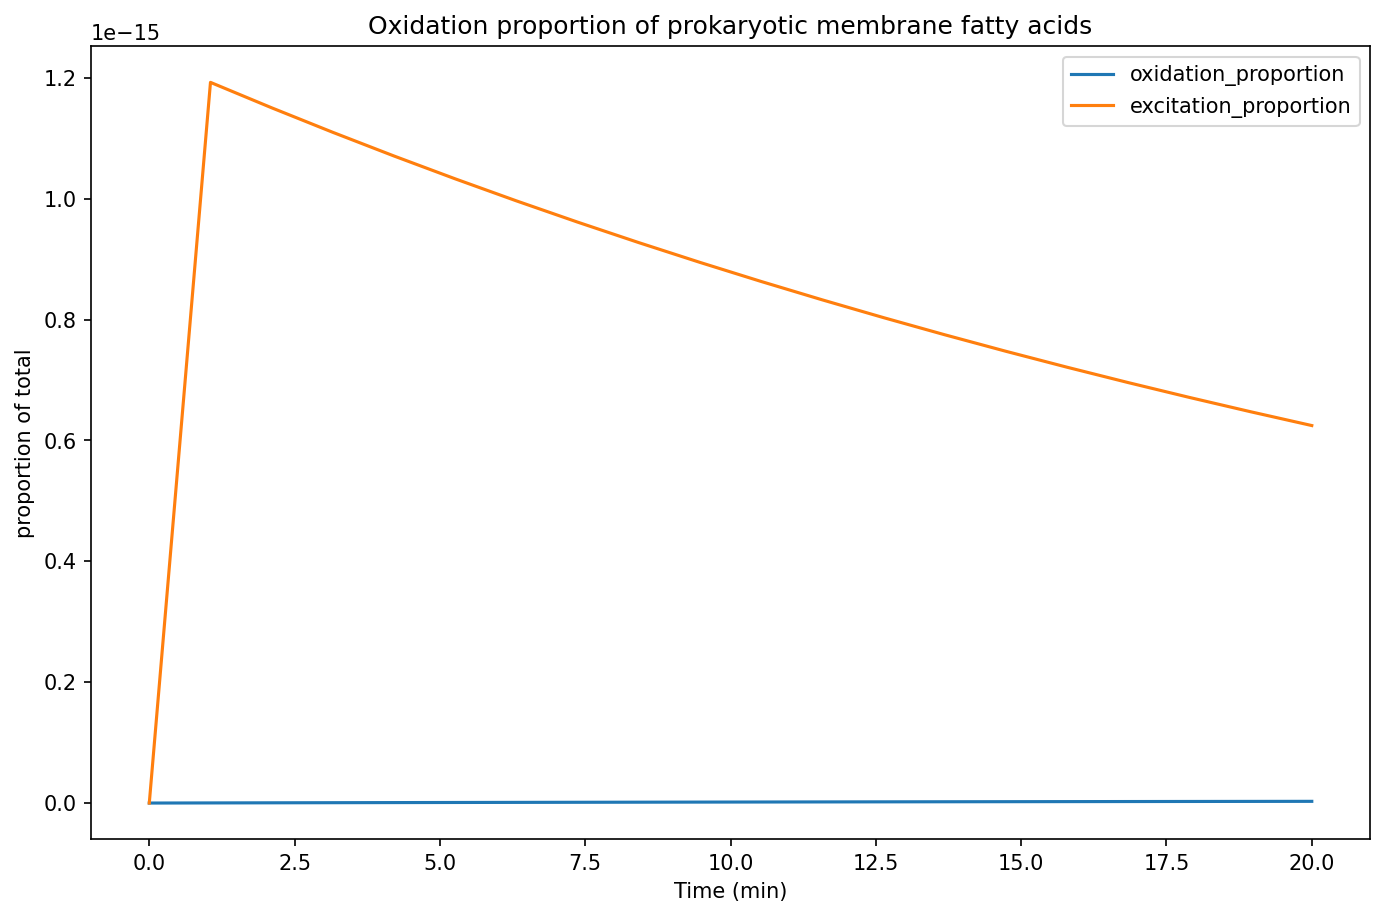

,parameter,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-12-06-PDIpy-A3B_4Zn-Saureus-11
1,singlet_oxygen_diffusion_distance (nm),0.000000
2,oxidation_angle,5
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,medium,water
5,solution_depth (m),0.010000
6,surface_area (m^2),0.005800
7,solution_volume (m^3),0.000058
8,bacterial_specie,Saureus
9,photosensitizer_selection,A3B_4Zn


,variable,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-12-06-PDIpy-A3B_4Zn-Saureus-11
1,center_porphyrin_length,0.000000
2,sp2_extension,0.000000
3,sp3_diazirine,0.000000
4,linked_sp3_diazirine,0.000000
5,photosensitizers,34928416408000000.000000
6,molecular_volume (m^3),0.000000
7,volume_proportion,0.000000
8,area_proportion,0.000004
9,photon_moles_per_second,0.000003


In [39]:
from scipy.constants import minute
import graphviz
import os
%run ../pdipy/core.py

pdi = PDIBacterialPkg(verbose = True, jupyter = True)
pdi.define_system(surface_area = 58, solution_depth = 1)
pdi.define_bacterium(bacterial_specie = 'Saureus')
pdi.define_photosensitizer(photosensitizer_molar = 1E-6, photosensitizer = 'A3B_4Zn')
pdi.define_light(light_source = 'LED', irradiance = 37.92,)
pdi.singlet_oxygen_calculations(timestep = 1, total_time = 20)
pdi.geometric_oxidation()
pdi.kinetic_calculation()
pdi.export()


# pdi.define('Saureus', 'A3B_4Zn', photosensitizer_conc = 1, light_source = 'LED', irradiance = 37.92)
# raw_data = pdi.time_to_threshold(timestep = .010, total_time = 2)

%matplotlib inline

# Surface system

The center porphyrin object is 6.1E-10 meters
The benzyl extension is 6.1E-10 meters
The diazirine is 7.2E-10 meters
Solution depth is not calculated for surface systems
The molecular length is 1.8E-9 meters
The molecular volume is 5.0E-28 cubic meters
The photosensitizer volume proportion is 2.8E1
The photosensitizer area proportion is 9.4E2
('photons per timestep: ', 2.6499937939966375e-05)
('molecular oxygen molecules: ', '2.8E-7')
('excited photosensitizer molecules: ', '8.9E22')
('effective excitation watts: ', '1.0E-2')
('oxidized volume proportion: ', 0.001902650954146388)
('volume:area consistency', True)
None
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + fa);

  // Reactions:
  _J0: ps -> e_ps; 10000000000*2.64999379399664e-5*ps;
  _J1: ps -> b_ps; 5.688*ps;
  _J2: e_ps + mo -> so; 0.48*2000000*e_ps*mo - 24998.1249531238*so;
  _J3: so + fa

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:376: Warning:

Graphviz is not installed in your machine or could not be found. 'draw' command cannot produce a diagram.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\core.py:377: Warning:

Graphviz is not installed in your machine or could not be found. 'draw' command cannot produce a diagram.



,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,9.147093e+01,0.000000,0.000000,2.812605e-07,0.000000e+00,0.001005,0.000000e+00
603.015075,9.656783e-70,91.468962,0.001963,1.721918e-27,6.063747e-24,0.001005,2.812605e-07
1206.030151,2.509925e-76,91.468962,0.001963,-2.780301e-28,-9.795239e-25,0.001005,2.812605e-07
1809.045226,2.222168e-76,91.468962,0.001963,-2.461739e-28,-8.672919e-25,0.001005,2.812605e-07
2412.060302,1.934411e-76,91.468962,0.001963,-2.143178e-28,-7.550600e-25,0.001005,2.812605e-07
...,...,...,...,...,...,...,...
117587.939698,0.000000e+00,91.468962,0.001963,2.851583e-33,1.004636e-29,0.001005,2.812605e-07
118190.954774,0.000000e+00,91.468962,0.001963,2.848316e-33,1.003485e-29,0.001005,2.812605e-07
118793.969849,0.000000e+00,91.468962,0.001963,2.845048e-33,1.002334e-29,0.001005,2.812605e-07


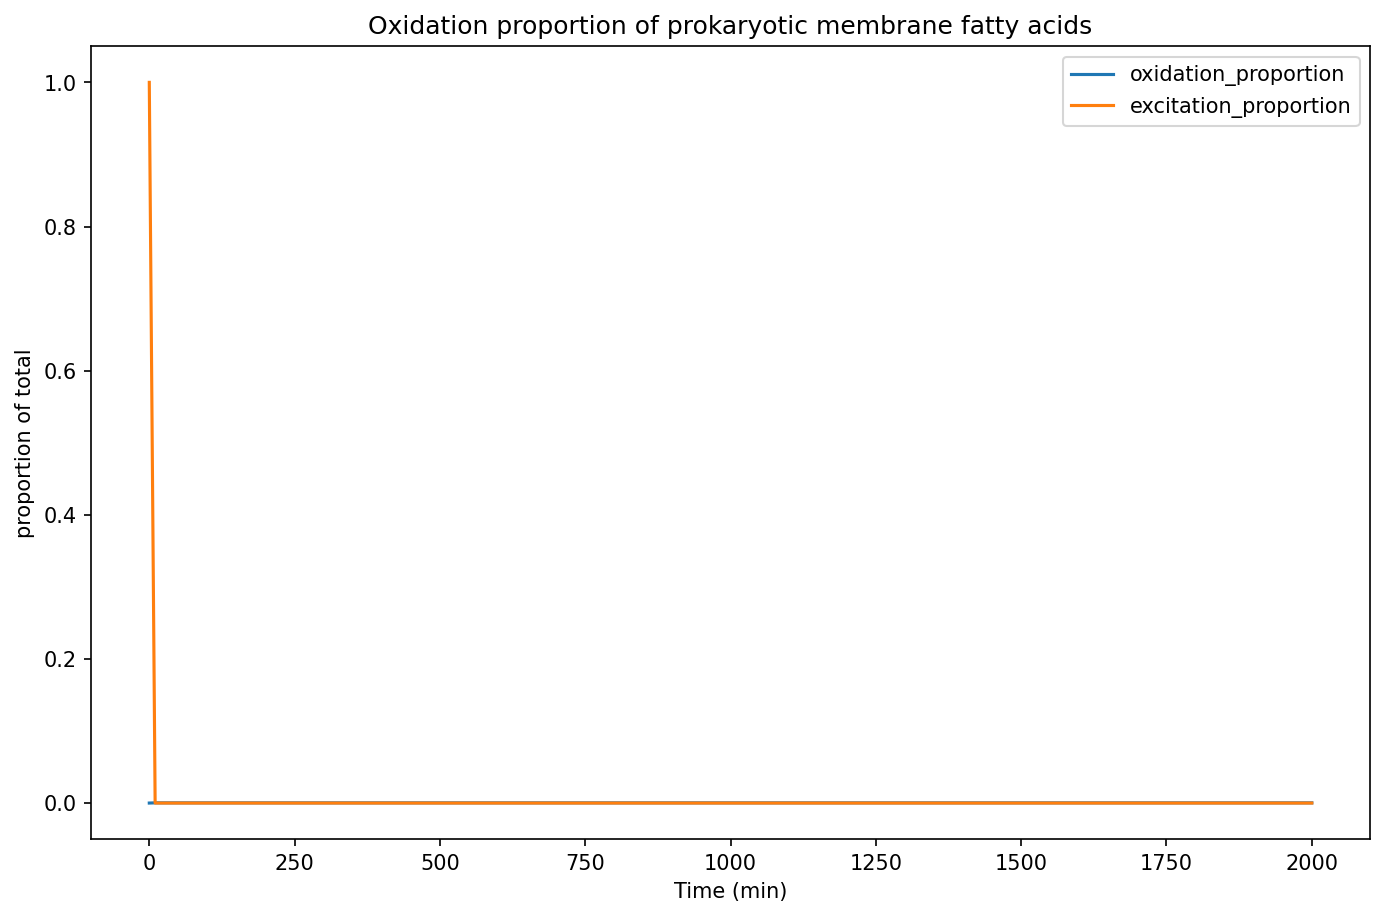

,parameter,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-12-01-PDIpy-A3B_4Zn-Saureus-6
1,singlet_oxygen_diffusion_distance (nm),0.000000
2,oxidation_angle,5
3,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
4,medium,water
5,photosensitizer_mg_per_disc,0.300000
6,cm2_per_disc,7.068583
7,surface_area (m^2),0.000707
8,photosensitizer_mg_per_sqr_cm,0.042441
9,bacterial_specie,Saureus


,variable,value
0,simulation_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\examples\2021-12-01-PDIpy-A3B_4Zn-Saureus-6
1,center_porphyrin_length,0.000000
2,sp2_extension,0.000000
3,sp3_diazirine,0.000000
4,linked_sp3_diazirine,0.000000
5,photosensitizers,122178730604427696.000000
6,molecular_volume (m^3),0.000000
7,volume_proportion,27.734160
8,area_proportion,935.074452
9,so_decay_time (s),0.000040


In [2]:
%run ../pdipy/core.py

pdi = PDIBacterialPkg(verbose = True, jupyter = True)
pdi.define_system(surface_system = True,)
pdi.define_bacterium(bacterial_specie = 'Saureus')
pdi.define_photosensitizer(photosensitizer_molar = 1E-6, photosensitizer = 'A3B_4Zn')
pdi.define_light(light_source = 'LED', irradiance = 37.92,)
pdi.singlet_oxygen_calculations(timestep = 10, total_time = 2000)
pdi.geometric_oxidation()
pdi.kinetic_calculation()
pdi.export()


# pdi.define('Saureus', 'A3B_4Zn', photosensitizer_conc = 1, light_source = 'LED', irradiance = 37.92)
# raw_data = pdi.time_to_threshold(timestep = .010, total_time = 2)

%matplotlib inline

# brainstorming

In [ ]:
import pdipy

pdi = pdipy.PDIBacterialPkg()
print(pdi.results)

// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species o, so, bcfa, ofa;

  // Assignment Rules:
  oxidation := ofa/(ofa + bcfa);

  // Reactions:
  _J0: o -> so; 1e-9*o;
  _J1: so + bcfa -> ofa; 12*so*bcfa;

  // Species initializations:
  o = 130000000000;
  so = 0;
  bcfa = 1000;
  ofa = 0;

  // Variable initializations:
  biofilm = 0.05;
  vitality = 0.1;

  // Other declarations:
  var oxidation;
  const biofilm, vitality;
end


Current integrator: 
 < roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false
         max_output_rows: 100000



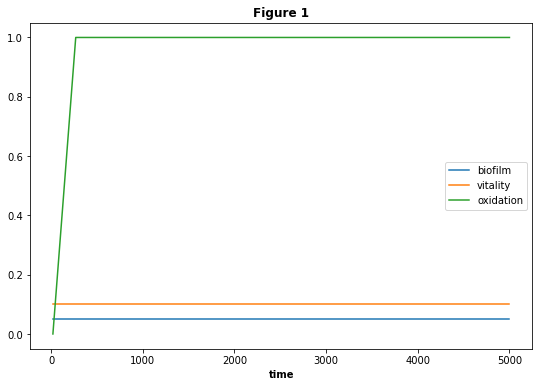

In [140]:
import tellurium

# define the first equation
k_so = 1e-9
mo = 1.3e11

# define the second equation
k = 12
bcfa = 1e3

# define constants
healing_kinetics = 3
biofilm_threshold = .05
death_threshold = 0.1

# define the SBML model
model = (f'''
  model pdi_oxidation
    # expressions
    o -> so;  {k_so}*o
    so + bcfa -> ofa; {k}*so*bcfa #- {healing_kinetics}*ofa    # the aggregated photons / second must be programmatically inserted into the rate expression         

    # define the first expression 
    o = {mo}

    # define the second expression
    so = 0
    ofa = 0
    bcfa = {bcfa}

    # define constants
    biofilm = {biofilm_threshold};
    vitality = {death_threshold};
    oxidation := ofa / (ofa + bcfa);

  end
''')
tellurium_model = tellurium.loada(model)
print(tellurium_model.getCurrentAntimony())
print('\nCurrent integrator:', '\n', tellurium_model.integrator)


# define the SEDML plot
initial_time = 20
final_time = 5000
total_points = 20
phrasedml_str = '''
  model1 = model "pdi_oxidation"
  sim1 = simulate uniform({}, {}, {})
  task1 = run sim1 on model1
  plot "Figure 1" time vs biofilm, vitality, oxidation
'''.format(initial_time, final_time, total_points)

# create, execute, and export an OMEX file
inline_omex = '\n'.join([model, phrasedml_str])               
tellurium.executeInlineOmex(inline_omex)